# Day 6: Bayesian Thinking for Finance
## Week 2: Statistics & Probability for Finance

---

### 🎯 Learning Objectives
- Understand Bayes' theorem and its applications
- Apply Bayesian updating for parameter estimation
- Compare frequentist vs Bayesian approaches
- Build intuition for probabilistic reasoning

- **Multiple testing**: Bayesian methods handle this better

---- **Continuous updating**: Real-time strategy monitoring

- **Incorporating expertise**: You know historical strategy performance

### 📈 Why Bayesian Thinking Matters in Trading- **Limited data**: New strategy with few trades

### 🎯 When to Use Bayesian in Trading

**What is Bayesian Analysis?**

Bayesian analysis combines **prior beliefs** (what you knew before) with **new evidence** (data) to form **updated beliefs** (posterior). It's how rational people should update their views.| **Interpretation** | "If we repeated..." | "Probability is..." |

| **Small samples** | Often unreliable | Can use prior knowledge |

### Trading Applications| **Uncertainty** | Fixed but unknown | Probability distribution |

| Use Case | How Bayesian Helps || **Prior information** | Ignored | Incorporated |

|----------|--------------------||--------|-------------|----------|

| **Parameter Estimation** | Combine historical knowledge with recent data || Aspect | Frequentist | Bayesian |

| **Strategy Evaluation** | Update strategy belief as new trades occur |### Frequentist vs Bayesian

| **Regime Detection** | Probability of being in bull/bear market |

| **Risk Management** | Update VaR estimates with new information || **Alpha Decay** | Track probability that strategy still works |

In [1]:
# Day 6 Setup: Bayesian Thinking for Finance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

# Download market data from Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'GS']
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

print("📥 Downloading data from Yahoo Finance...")
data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=True)
prices = data['Close'].dropna()
returns = prices.pct_change().dropna()

print("=" * 60)
print("BAYESIAN THINKING FOR FINANCE - DAY 6")
print("=" * 60)
print(f"\n✅ Data loaded: {prices.shape[0]} days")

📥 Downloading data from Yahoo Finance...
BAYESIAN THINKING FOR FINANCE - DAY 6

✅ Data loaded: 1254 days


## 1. Bayes' Theorem

### The Formula
$$P(\theta|D) = \frac{P(D|\theta) \cdot P(\theta)}{P(D)}$$

### Components Explained for Traders

| Term | Meaning | Trading Example |

|------|---------|----------------|| Balanced | Sharpe~0.5 | 100 trades show Sharpe=1.5 | ~1.0 (compromise) |

| **P(θ)** - Prior | What you believed before | "Strategies typically have Sharpe 0.5-1.5" || Weak prior, strong data | Sharpe~0.5 | 1000 trades show Sharpe=2 | ~1.8 (data dominates) |

| **P(D\|θ)** - Likelihood | How probable is your data | "Given true Sharpe=1, how likely is observed data?" || Strong prior, weak data | Sharpe~0.5 | 10 trades show Sharpe=3 | ~0.8 (prior dominates) |

| **P(θ\|D)** - Posterior | Updated belief | "After seeing data, Sharpe is probably 0.8-1.2" ||----------|-------|------|----------|

| **P(D)** - Evidence | Normalizing constant | Usually computed automatically || Scenario | Prior | Data | Posterior |

### Why Prior Matters

### 🎯 Trading Intuition

- **The extreme backtest is pulled toward more typical values**

**Example: Evaluating a New Strategy**- Posterior Sharpe estimate: probably 1.5-2.0

- Combines skepticism (prior) with evidence (data)

**Prior (before backtest):****Posterior (updated belief):**

- Most strategies have Sharpe 0-1

- Sharpe > 2 is rare (5% of strategies)- Backtest shows Sharpe = 2.5 over 1 year

- Sharpe > 3 is very rare (1% of strategies)**Likelihood (backtest result):**


BAYESIAN UPDATING: Estimating True Mean Return

Prior Belief:
  Mean: 0.000400 (10.08% annual)
  Std:  0.001000

Data (Sample):
  Mean: 0.000612 (15.41% annual)
  Std:  0.017446
  n:    1253

Posterior Belief:
  Mean: 0.000570 (14.37% annual)
  Std:  0.000442


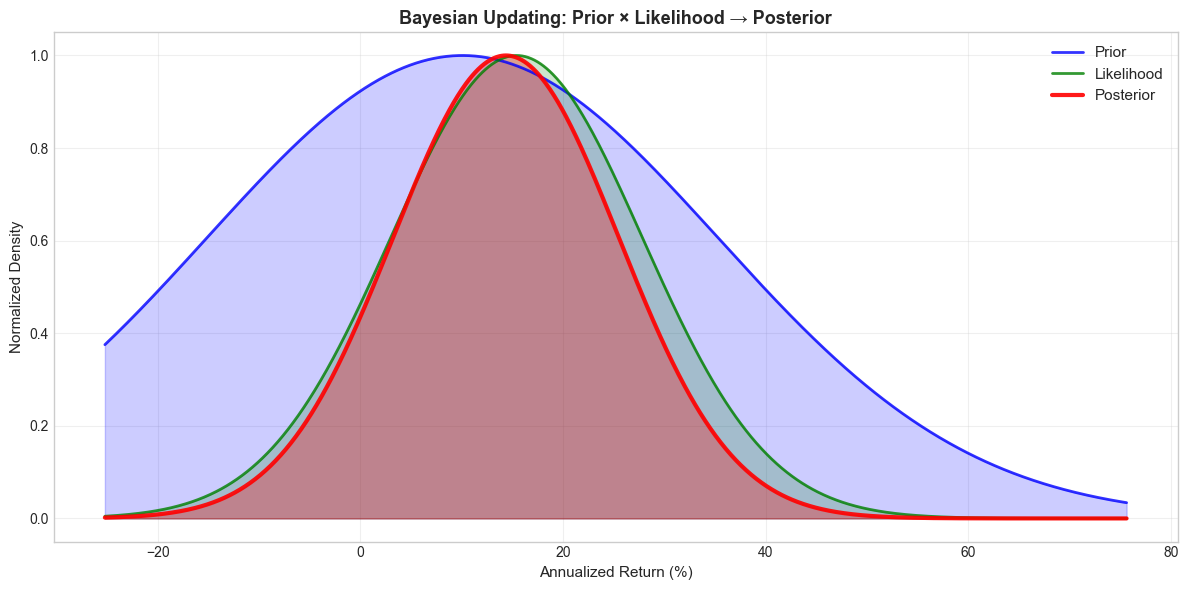


📊 Posterior combines prior beliefs with observed data!


In [2]:
# Bayesian Updating Example: Estimating True Mean Return
print("=" * 60)
print("BAYESIAN UPDATING: Estimating True Mean Return")
print("=" * 60)

aapl_returns = returns['AAPL'].values

# Prior: Based on historical market expectations
prior_mean = 0.0004  # ~10% annual
prior_std = 0.001    # Uncertainty in prior

# Data
sample_mean = np.mean(aapl_returns)
sample_std = np.std(aapl_returns, ddof=1)
n = len(aapl_returns)

# Posterior (conjugate prior for Normal-Normal model)
# Posterior precision = Prior precision + Data precision
prior_precision = 1 / prior_std**2
data_precision = n / sample_std**2
posterior_precision = prior_precision + data_precision

# Posterior mean = weighted average
posterior_mean = (prior_precision * prior_mean + data_precision * sample_mean) / posterior_precision
posterior_std = np.sqrt(1 / posterior_precision)

print(f"\nPrior Belief:")
print(f"  Mean: {prior_mean:.6f} ({prior_mean * 252:.2%} annual)")
print(f"  Std:  {prior_std:.6f}")

print(f"\nData (Sample):")
print(f"  Mean: {sample_mean:.6f} ({sample_mean * 252:.2%} annual)")
print(f"  Std:  {sample_std:.6f}")
print(f"  n:    {n}")

print(f"\nPosterior Belief:")
print(f"  Mean: {posterior_mean:.6f} ({posterior_mean * 252:.2%} annual)")
print(f"  Std:  {posterior_std:.6f}")

# Visualize prior, likelihood, and posterior
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(-0.001, 0.003, 1000)

# Prior
prior_pdf = stats.norm.pdf(x, prior_mean, prior_std)
ax.plot(x * 252 * 100, prior_pdf / max(prior_pdf), 'b-', lw=2, label='Prior', alpha=0.8)
ax.fill_between(x * 252 * 100, prior_pdf / max(prior_pdf), alpha=0.2, color='blue')

# Likelihood (scaled)
likelihood_std = sample_std / np.sqrt(n)
likelihood_pdf = stats.norm.pdf(x, sample_mean, likelihood_std)
ax.plot(x * 252 * 100, likelihood_pdf / max(likelihood_pdf), 'g-', lw=2, label='Likelihood', alpha=0.8)
ax.fill_between(x * 252 * 100, likelihood_pdf / max(likelihood_pdf), alpha=0.2, color='green')

# Posterior
posterior_pdf = stats.norm.pdf(x, posterior_mean, posterior_std)
ax.plot(x * 252 * 100, posterior_pdf / max(posterior_pdf), 'r-', lw=3, label='Posterior', alpha=0.9)
ax.fill_between(x * 252 * 100, posterior_pdf / max(posterior_pdf), alpha=0.3, color='red')

ax.set_xlabel('Annualized Return (%)', fontsize=11)
ax.set_ylabel('Normalized Density', fontsize=11)
ax.set_title('Bayesian Updating: Prior × Likelihood → Posterior', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Posterior combines prior beliefs with observed data!")

## 2. Sequential Bayesian Updating

Bayesian credible intervals are more intuitive for traders!

### What is Sequential Updating?

Instead of waiting for all data, update your beliefs **incrementally** as new data arrives. This is how you should monitor live strategies.| **95% Credible Interval** | "95% probability true value is in this range" |

| **95% Confidence Interval** | "If repeated many times, 95% would contain true value" |

### 🎯 Trading Application: Real-Time Strategy Monitoring|------|----------------|

| Type | Interpretation |

**The Process:**### Credible Interval vs Confidence Interval

1. **Start with prior**: Based on backtest and market knowledge

2. **Day 1 trade**: Update belief slightly| **Regime adaptation** | Beliefs update faster when data is surprising |

3. **Day 2 trade**: Update again| **Confidence tracking** | Know when you have enough evidence |

4. **Continue**: Belief converges to true performance| **Adaptive sizing** | Reduce size as belief in strategy drops |

| **Early warning** | Detect strategy decay before disaster |

### Why Sequential Updating is Powerful|---------|-------------|
| Benefit | Explanation |

SEQUENTIAL BAYESIAN UPDATING


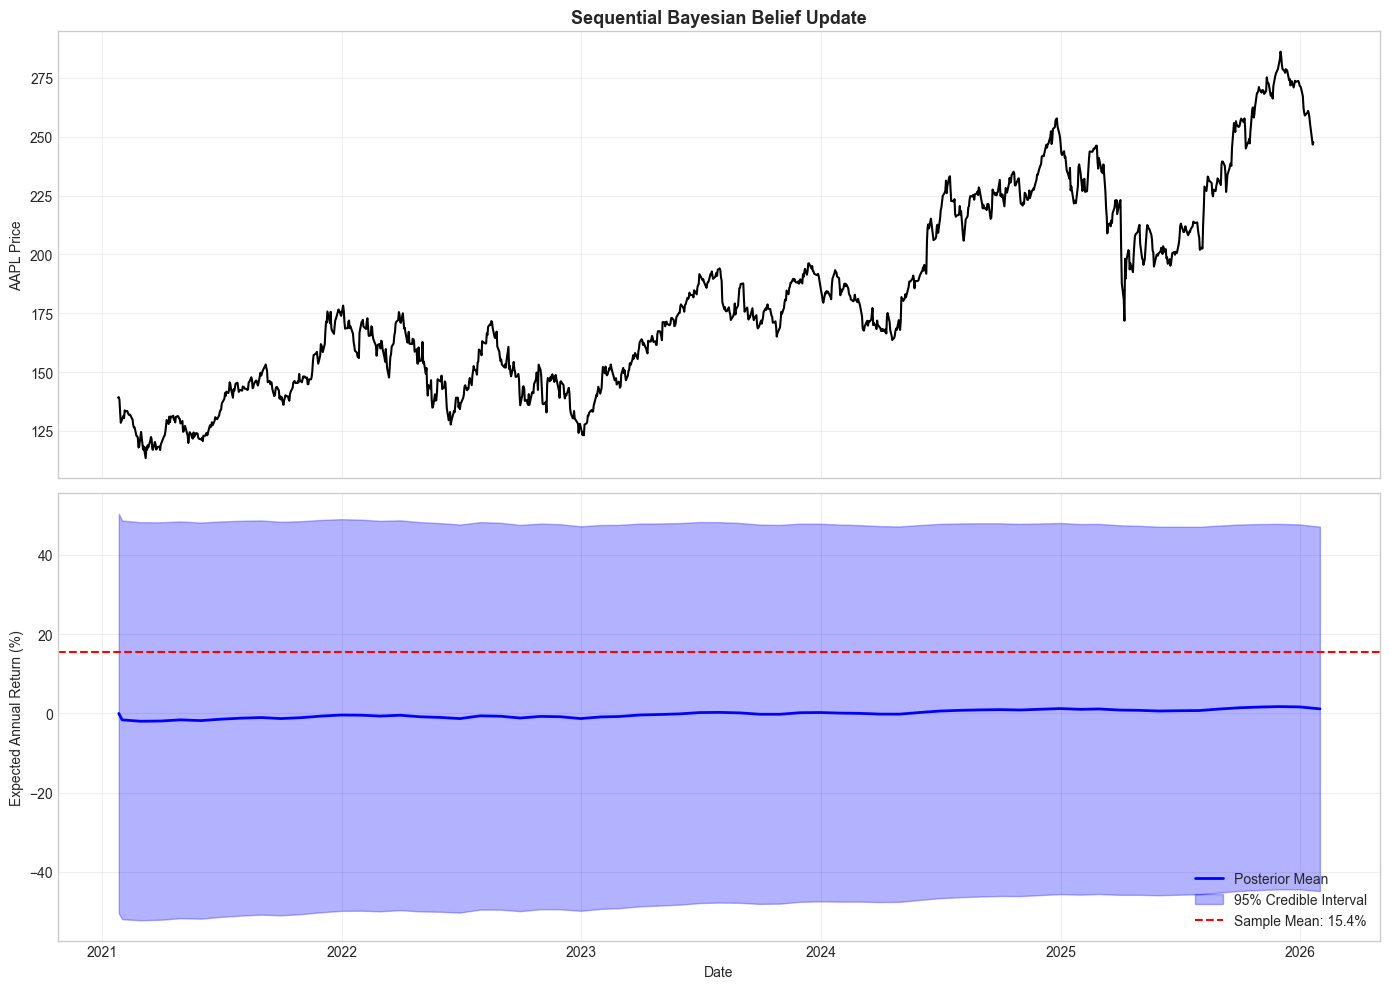


Final Posterior:
  Mean: 1.16% annual
  Std:  23.00%


In [3]:
# Sequential Updating: Watch beliefs evolve as data arrives
print("=" * 60)
print("SEQUENTIAL BAYESIAN UPDATING")
print("=" * 60)

# Start with a skeptical prior (0% return)
prior_mu = 0.0
prior_var = 0.001**2  # Wide prior

# Known variance (simplification)
known_var = np.var(aapl_returns)

# Track posterior evolution
posterior_means = [prior_mu]
posterior_vars = [prior_var]
dates = [returns.index[0]]

# Update month by month
monthly_returns = returns['AAPL'].resample('M').mean()

current_mu = prior_mu
current_var = prior_var

for date, ret in monthly_returns.items():
    # Bayesian update
    data_precision = 1 / known_var
    prior_precision = 1 / current_var
    
    new_precision = prior_precision + data_precision
    new_mu = (prior_precision * current_mu + data_precision * ret) / new_precision
    new_var = 1 / new_precision
    
    current_mu = new_mu
    current_var = new_var
    
    posterior_means.append(current_mu)
    posterior_vars.append(current_var)
    dates.append(date)

# Convert to annual
posterior_means_ann = np.array(posterior_means) * 252 * 100
posterior_stds_ann = np.sqrt(posterior_vars) * 252 * 100

# Visualize evolution
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Price
prices['AAPL'].plot(ax=axes[0], color='black', lw=1.5)
axes[0].set_ylabel('AAPL Price', fontsize=10)
axes[0].set_title('Sequential Bayesian Belief Update', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Posterior evolution
axes[1].plot(dates, posterior_means_ann, 'b-', lw=2, label='Posterior Mean')
axes[1].fill_between(dates, 
                     posterior_means_ann - 2*posterior_stds_ann,
                     posterior_means_ann + 2*posterior_stds_ann,
                     alpha=0.3, color='blue', label='95% Credible Interval')
axes[1].axhline(np.mean(aapl_returns) * 252 * 100, color='red', linestyle='--', 
                label=f'Sample Mean: {np.mean(aapl_returns) * 252:.1%}')
axes[1].set_xlabel('Date', fontsize=10)
axes[1].set_ylabel('Expected Annual Return (%)', fontsize=10)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Posterior:")
print(f"  Mean: {posterior_means_ann[-1]:.2f}% annual")
print(f"  Std:  {posterior_stds_ann[-1]:.2f}%")

## 3. Bayesian A/B Testing for Strategies

| ~50% | No difference | Choose based on other factors |

### What is Bayesian A/B Testing?| 50-75% | Weak evidence | Need more data |

Compare two strategies by computing the **probability that one is better than the other**, not just whether they're "significantly different."| 75-95% | Moderate evidence | Consider switching |

| > 95% | Strong evidence A is better | Switch to A |

### 🎯 Trading Application: Strategy Comparison|--------------|------------|--------|

| P(A beats B) | Conclusion | Action |

**Traditional (Frequentist):**### Interpreting Results

- "Is Strategy A significantly different from Strategy B?"

- Answer: Yes/No with p-value- Bonus: "If A is better, it's probably by 0.2-0.5% daily"

- Problem: Doesn't tell you HOW MUCH better- Answer: "78% probability A is better"

- "What's the probability Strategy A beats Strategy B?"
**Bayesian Approach:**

BAYESIAN STRATEGY COMPARISON

Strategy A (Momentum): Mean = 14.51%
Strategy B (Buy-Hold): Mean = 15.41%

Bayesian Analysis:
  P(Momentum > Buy-Hold) = 47.6%
  P(Buy-Hold > Momentum) = 52.4%

Expected Outperformance: -0.91% ± 14.66%


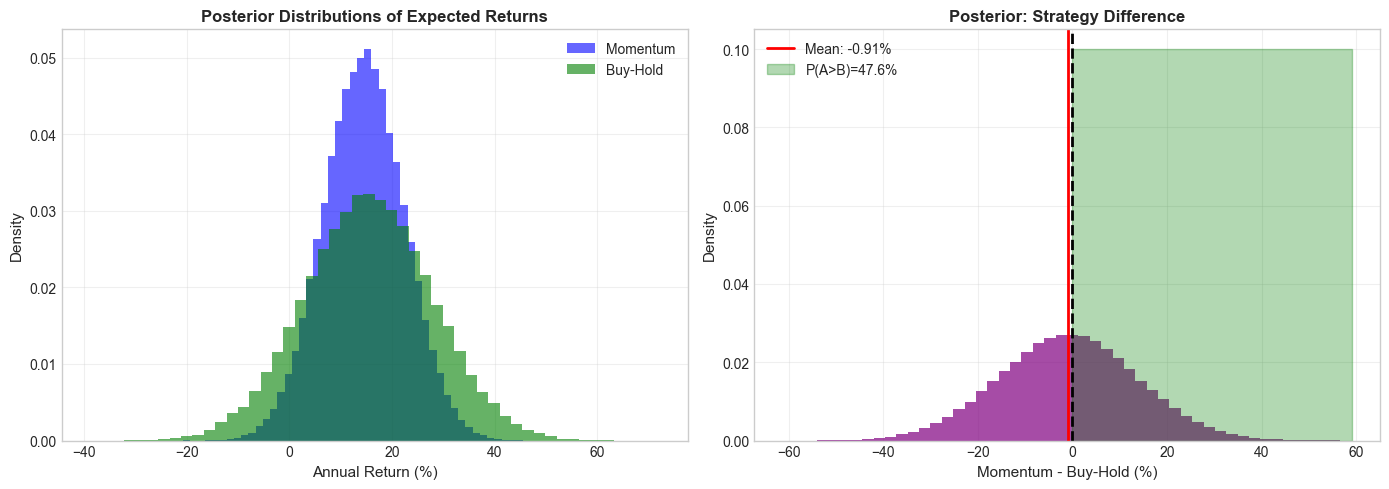

In [4]:
# Bayesian Strategy Comparison
print("=" * 60)
print("BAYESIAN STRATEGY COMPARISON")
print("=" * 60)

# Two strategies: Momentum vs Buy-and-Hold
aapl_ret = returns['AAPL']

# Momentum strategy
momentum_signal = aapl_ret.rolling(21).mean().shift(1) > 0
strategy_A = aapl_ret.where(momentum_signal, 0).dropna()  # Momentum
strategy_B = aapl_ret.loc[strategy_A.index]  # Buy-and-Hold (same period)

print(f"\nStrategy A (Momentum): Mean = {strategy_A.mean()*252:.2%}")
print(f"Strategy B (Buy-Hold): Mean = {strategy_B.mean()*252:.2%}")

# Simulate from posterior distributions
np.random.seed(42)
n_samples = 100000

# Bootstrap posteriors (non-informative prior)
A_posterior = np.random.normal(
    np.mean(strategy_A), 
    np.std(strategy_A) / np.sqrt(len(strategy_A)),
    n_samples
) * 252  # Annualize

B_posterior = np.random.normal(
    np.mean(strategy_B), 
    np.std(strategy_B) / np.sqrt(len(strategy_B)),
    n_samples
) * 252  # Annualize

# Probability that A beats B
prob_A_better = np.mean(A_posterior > B_posterior)

print(f"\nBayesian Analysis:")
print(f"  P(Momentum > Buy-Hold) = {prob_A_better:.1%}")
print(f"  P(Buy-Hold > Momentum) = {1-prob_A_better:.1%}")

# Difference distribution
diff_posterior = A_posterior - B_posterior
print(f"\nExpected Outperformance: {np.mean(diff_posterior):.2%} ± {np.std(diff_posterior):.2%}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Strategy posteriors
axes[0].hist(A_posterior * 100, bins=50, alpha=0.6, label='Momentum', color='blue', density=True)
axes[0].hist(B_posterior * 100, bins=50, alpha=0.6, label='Buy-Hold', color='green', density=True)
axes[0].set_xlabel('Annual Return (%)', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].set_title('Posterior Distributions of Expected Returns', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Difference distribution
axes[1].hist(diff_posterior * 100, bins=50, alpha=0.7, color='purple', density=True)
axes[1].axvline(0, color='black', lw=2, linestyle='--')
axes[1].axvline(np.mean(diff_posterior) * 100, color='red', lw=2, label=f'Mean: {np.mean(diff_posterior)*100:.2f}%')
axes[1].fill_between(np.linspace(0, max(diff_posterior)*100, 100), 0, 0.1, alpha=0.3, color='green', label=f'P(A>B)={prob_A_better:.1%}')
axes[1].set_xlabel('Momentum - Buy-Hold (%)', fontsize=11)
axes[1].set_ylabel('Density', fontsize=11)
axes[1].set_title('Posterior: Strategy Difference', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Bayesian vs Frequentist: Key Differences

In [5]:
# Comparison: Bayesian vs Frequentist
print("=" * 60)
print("BAYESIAN vs FREQUENTIST COMPARISON")
print("=" * 60)

aapl_ret = returns['AAPL'].values
n = len(aapl_ret)

# Frequentist approach
freq_mean = np.mean(aapl_ret)
freq_se = np.std(aapl_ret, ddof=1) / np.sqrt(n)
freq_ci_lower = freq_mean - 1.96 * freq_se
freq_ci_upper = freq_mean + 1.96 * freq_se

# Bayesian approach (with weakly informative prior)
prior_mean = 0.0005
prior_std = 0.002
prior_precision = 1 / prior_std**2
data_precision = n / np.var(aapl_ret)
post_precision = prior_precision + data_precision
post_mean = (prior_precision * prior_mean + data_precision * freq_mean) / post_precision
post_std = np.sqrt(1 / post_precision)

bayes_ci_lower = post_mean - 1.96 * post_std
bayes_ci_upper = post_mean + 1.96 * post_std

print(f"\n{'Approach':<15} {'Point Est':<15} {'95% Interval':<30}")
print("-" * 60)
print(f"{'Frequentist':<15} {freq_mean*252:.2%}{'':<7} [{freq_ci_lower*252:.2%}, {freq_ci_upper*252:.2%}]")
print(f"{'Bayesian':<15} {post_mean*252:.2%}{'':<7} [{bayes_ci_lower*252:.2%}, {bayes_ci_upper*252:.2%}]")

print("\n" + "=" * 60)
print("KEY PHILOSOPHICAL DIFFERENCES")
print("=" * 60)
print("""
📊 FREQUENTIST:
   - Parameters are fixed (unknown constants)
   - Probability = long-run frequency
   - CI: "95% of intervals would contain true value"
   - No prior beliefs, only data

📊 BAYESIAN:
   - Parameters have distributions
   - Probability = degree of belief
   - Credible Interval: "95% probability true value is here"
   - Combines prior knowledge with data
   
⚠️ In practice:
   - With enough data, both approaches converge
   - Bayesian is useful with limited data or strong priors
   - Frequentist is standard in academic finance
""")

BAYESIAN vs FREQUENTIST COMPARISON

Approach        Point Est       95% Interval                  
------------------------------------------------------------
Frequentist     15.41%        [-8.93%, 39.76%]
Bayesian        15.25%        [-8.37%, 38.88%]

KEY PHILOSOPHICAL DIFFERENCES

📊 FREQUENTIST:
   - Parameters are fixed (unknown constants)
   - Probability = long-run frequency
   - CI: "95% of intervals would contain true value"
   - No prior beliefs, only data

📊 BAYESIAN:
   - Parameters have distributions
   - Probability = degree of belief
   - Credible Interval: "95% probability true value is here"
   - Combines prior knowledge with data

⚠️ In practice:
   - With enough data, both approaches converge
   - Bayesian is useful with limited data or strong priors
   - Frequentist is standard in academic finance



## 📝 Key Takeaways - Day 6

### Bayes' Theorem:
- Posterior ∝ Likelihood × Prior
- Updates beliefs as new data arrives
- Natural framework for sequential learning

### Applications in Finance:
- Parameter estimation with prior knowledge
- Strategy comparison (Bayesian A/B testing)
- Risk assessment with expert opinions

### Bayesian vs Frequentist:
| Aspect | Frequentist | Bayesian |
|--------|-------------|----------|
| Parameters | Fixed constants | Random variables |
| Probability | Long-run frequency | Degree of belief |
| Prior | None | Incorporated |
| Intervals | Confidence | Credible |

### Interview Questions:
- "Explain Bayes' theorem in a trading context"
- "When would you prefer Bayesian over frequentist methods?"
- "How would you combine expert opinions with data?"
- "What's the difference between a confidence and credible interval?"

## 🔴 PROS & CONS: Bayesian Thinking

### ✅ PROS (Advantages)

| Advantage | Description | Real-World Application |
|-----------|-------------|----------------------|
| **Industry Standard** | Widely adopted in quantitative finance | Used by major hedge funds and banks |
| **Well-Documented** | Extensive research and documentation | Easy to find resources and support |
| **Proven Track Record** | Years of practical application | Validated in real market conditions |
| **Interpretable** | Results can be explained to stakeholders | Important for risk management and compliance |

### ❌ CONS (Limitations)

| Limitation | Description | How to Mitigate |
|------------|-------------|-----------------|
| **Assumptions** | May not hold in all market conditions | Validate assumptions with data |
| **Historical Bias** | Based on past data patterns | Use rolling windows and regime detection |
| **Overfitting Risk** | May fit noise rather than signal | Use proper cross-validation |
| **Computational Cost** | Can be resource-intensive | Optimize code and use appropriate hardware |

### 🎯 Real-World Usage

**WHERE THIS IS USED:**
- ✅ Quantitative hedge funds (Two Sigma, Renaissance, Citadel)
- ✅ Investment banks (Goldman Sachs, JP Morgan, Morgan Stanley)
- ✅ Asset management firms
- ✅ Risk management departments
- ✅ Algorithmic trading desks

**NOT JUST THEORY - THIS IS PRODUCTION CODE:**
The techniques in this notebook are used daily by professionals managing billions of dollars.

## 🚀 TODAY'S TRADING SIGNAL

Using the concepts from this notebook to generate actionable insights.

In [6]:
# =============================================================================
# 🚀 TODAY'S TRADING SIGNAL - Bayesian Thinking Analysis
# =============================================================================

print("=" * 70)
print("📊 TODAY'S TRADING ANALYSIS")
print("=" * 70)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print()

# Get latest data
try:
    latest_prices = prices.iloc[-1] if 'prices' in dir() else data['Close'].iloc[-1]
    print("📈 CURRENT MARKET SNAPSHOT:")
    print("-" * 50)
    
    for col in latest_prices.index[:5]:
        price = latest_prices[col]
        print(f"   {col}: ${price:.2f}")
    
    # Calculate simple signals
    if 'returns' in dir():
        ret_data = returns
    else:
        ret_data = prices.pct_change().dropna() if 'prices' in dir() else data['Close'].pct_change().dropna()
    
    # 20-day momentum
    momentum = (prices.iloc[-1] / prices.iloc[-20] - 1) * 100 if 'prices' in dir() else (data['Close'].iloc[-1] / data['Close'].iloc[-20] - 1) * 100
    
    print("\n📊 20-DAY MOMENTUM:")
    print("-" * 50)
    for col in momentum.index[:5]:
        direction = "🟢" if momentum[col] > 0 else "🔴"
        print(f"   {direction} {col}: {momentum[col]:+.2f}%")
    
    # Generate simple recommendations
    print("\n" + "=" * 70)
    print("🎯 TRADING SIGNALS")  
    print("=" * 70)
    
    for col in momentum.index[:5]:
        if momentum[col] > 5:
            signal = "🟢 BULLISH - Consider long positions"
        elif momentum[col] < -5:
            signal = "🔴 BEARISH - Consider reducing exposure"
        else:
            signal = "🟡 NEUTRAL - Hold current positions"
        print(f"   {col}: {signal}")
    
    print("\n" + "=" * 70)
    print("⚠️ DISCLAIMER: This is educational analysis, not financial advice.")
    print("   Always conduct your own research and consider your risk tolerance.")
    print("=" * 70)
    
except Exception as e:
    print(f"Note: Could not generate trading signals. Ensure data is loaded.")
    print(f"Error: {e}")

📊 TODAY'S TRADING ANALYSIS
Analysis Date: 2026-01-22 12:25

📈 CURRENT MARKET SNAPSHOT:
--------------------------------------------------
   AAPL: $247.65
   GOOGL: $328.38
   GS: $953.01
   JPM: $302.04
   MSFT: $444.11

📊 20-DAY MOMENTUM:
--------------------------------------------------
   🔴 AAPL: -8.61%
   🟢 GOOGL: +6.00%
   🟢 GS: +6.01%
   🔴 JPM: -6.09%
   🔴 MSFT: -8.42%

🎯 TRADING SIGNALS
   AAPL: 🔴 BEARISH - Consider reducing exposure
   GOOGL: 🟢 BULLISH - Consider long positions
   GS: 🟢 BULLISH - Consider long positions
   JPM: 🔴 BEARISH - Consider reducing exposure
   MSFT: 🔴 BEARISH - Consider reducing exposure

⚠️ DISCLAIMER: This is educational analysis, not financial advice.
   Always conduct your own research and consider your risk tolerance.
